In [2]:
from text_mining_preprocess_0705 import read_file_as_dataframe
ja_df=read_file_as_dataframe("c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\ja_slide9_data.xlsx",col_list=[15],name_list=['sentence'])
ja_df.head(3)

sentence
0  もっとベタニスベオーバを学ぶ
1            特になし
2    他剤理解しTOV継続訴求

In [3]:
from text_mining_preprocess_0705 import TextMiningPreprocess
language_outcome=TextMiningPreprocess(ja_df).language_detection()
language_outcome

'ja'

In [4]:
from text_mining_preprocess_0705 import TextMiningPreprocess
ja_text_mining=TextMiningPreprocess(ja_df)
ja_SentenceList=ja_text_mining.create_SentenceList()
ja_SentenceList[0:5]

['もっとベタニスベオーバを学ぶ',
 '特になし',
 '他剤理解しTOV継続訴求',
 '不安は無いです',
 'インサイトの深堀が重要であることは着任時から重要と思い指導している。しかし、現場で出来ているかと言えば、出来ていないMRもいる。\n今回のFFTでインサイトの深堀が重要だというのはMRに伝わったと感じる。しかし、これが現場で使うにはもっとトレーニングが必要であると感じている']

In [5]:
from text_mining_preprocess_0705 import TextMiningPreprocess
japan_text_mining=TextMiningPreprocess(ja_df)
ja_WordList_in_SentenceList=japan_text_mining.token_japanese_sentence()
ja_WordList_in_SentenceList[0:3]

[['もっと', 'ベタニスベオ', ' ', 'バ', 'を', '学ぶ'],
 ['特に', 'なし'],
 ['他', '剤', '理解', 'し', '   ', '継続', '訴求']]

In [35]:
# def flatten_list(two_d_list):
#     '''
#     Converting a 2D list(WordList_in_SentenceList) into a 1D list.
#     In WordList_in_SentenceList, word list are grouped by sentence. 
#     This function return a 1d word list which contains all the words that appear in the dataframe
#     '''
#     flat_list = []
#     # Iterate through the outer list
#     for element in two_d_list:
#         if type(element) is list:
#             # If the element is of type list, iterate through the sublist
#             for item in element:
#                 flat_list.append(item)
#         else:
#             flat_list.append(element)
 
#     return flat_list
import utils as U
from janome.tokenizer import Tokenizer
import re
from collections import Counter
# text = ja_concat_sentence_text

t = Tokenizer()
words_pos = []
sentences=ja_df['sentence'].tolist()
for text in sentences:
    for token in t.tokenize(text):
        speechs = token.part_of_speech.split(',')
        words_pos.append(speechs)
words_pos_list=U.flatten_list(words_pos)#words_pos是一个2-d list

counts = Counter( words_pos_list)
counts

Counter({'副詞': 44,
         '一般': 606,
         '*': 3289,
         '名詞': 720,
         '助詞': 493,
         '格助詞': 245,
         '動詞': 213,
         '自立': 212,
         '形容詞': 49,
         '接尾': 90,
         'サ変接続': 196,
         '形容動詞語幹': 44,
         '係助詞': 41,
         '助動詞': 123,
         '連体化': 103,
         '固有名詞': 51,
         '人名': 20,
         '姓': 4,
         '非自立': 75,
         '副詞可能': 24,
         '引用': 23,
         '接続助詞': 59,
         '記号': 118,
         '句点': 52,
         '接続詞': 3,
         '読点': 32,
         '副助詞／並立助詞／終助詞': 8,
         '組織': 34,
         '空白': 5,
         '連語': 26,
         '代名詞': 3,
         '助詞類接続': 18,
         '並立助詞': 16,
         '接頭詞': 28,
         '名詞接続': 25,
         'アルファベット': 15,
         '数': 15,
         '数接続': 3,
         '名': 13,
         '副助詞': 11,
         '連体詞': 4,
         '助動詞語幹': 6,
         '副詞化': 8,
         '終助詞': 2,
         'ナイ形容詞語幹': 3,
         '括弧開': 4,
         '括弧閉': 4})

In [21]:
import utils as U
ja_word_list = U.flatten_list(ja_WordList_in_SentenceList)
ja_concat_sentence_text = ja_text_mining.concat_sentence()
# ja_word_list
# ja_concat_sentence_text

#### japanese text statistical analysis

In [7]:
from text_mining_statistics import Statictics
ja_statistics=Statictics(ja_df)
ja_one_word_cnt_dict,ja_one_word_cnt_df=ja_statistics.one_word_freq(ja_WordList_in_SentenceList)
# ja_one_word_cnt_dict

In [8]:
import text_mining_preprocess_0705 as P 
ja_cnt_sorted_dict = P.sort_dict_by_value(ja_one_word_cnt_dict)

In [9]:
ja_part_of_speech_df = ja_statistics.part_of_speech_dataframe('ja',ja_word_list)
ja_part_of_speech_df

part of speech  count
0              副詞     44
1              一般    606
2               *   3289
3              名詞    720
4              助詞    493
5             格助詞    245
6              動詞    213
7              自立    212
8             形容詞     49
9              接尾     90
10           サ変接続    196
11         形容動詞語幹     44
12            係助詞     41
13            助動詞    123
14            連体化    103
15           固有名詞     51
16             人名     20
17              姓      4
18            非自立     75
19           副詞可能     24
20             引用     23
21           接続助詞     59
22             記号    118
23             句点     52
24            接続詞      3
25             読点     32
26   副助詞／並立助詞／終助詞      8
27             組織     34
28             空白      5
29             連語     26
30            代名詞      3
31          助詞類接続     18
32           並立助詞     16
33            接頭詞     28
34           名詞接続     25
35        アルファベット     15
36              数     15
37            数接続      3
38              名     13
39            副助詞     11
40            連体詞      4
41          助動詞語幹      6
42            副詞化      8
43            終助詞      2
44        ナイ形容詞語幹      3
45            括弧開      4
46            括弧閉      4

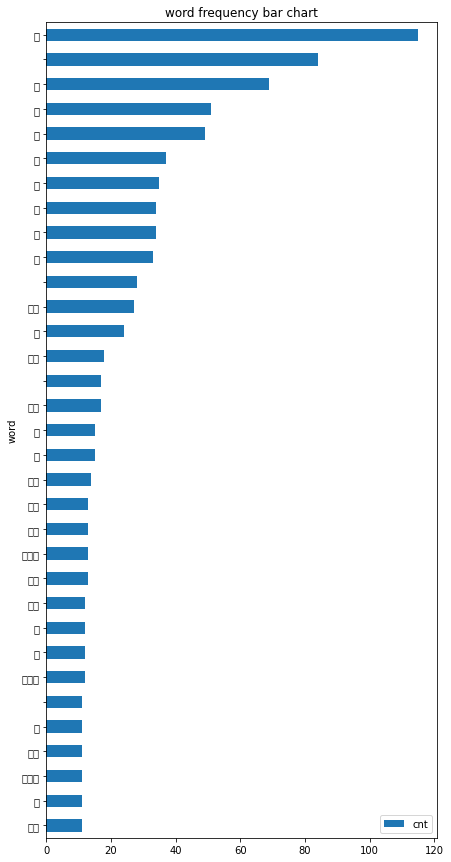

In [14]:
ja_statistics.barh_plot(ja_one_word_cnt_df,col_name='cnt',word_cnt=10)

In [22]:
ja_unit2_permutation = ja_statistics.unit2_permutation(ja_word_list)

In [23]:
ja_unit2_dictionary = ja_statistics.unit2_dictionary(ja_concat_sentence_text)

In [24]:
ja_two_word_permutation_freq=ja_statistics.two_word_permutation_freq(ja_unit2_dictionary)
ja_two_word_permutation_freq

two_word  two_word_freq
0          たい             27
1          てい             23
2          して             20
3          した             20
4         したい             14
...       ...            ...
1374     稼働計画              1
1375      計画を              1
1376    リプランし              1
1377      積極的              1
1378    ございませ              1

[1379 rows x 2 columns]

In [26]:
ja_bigram_df=ja_statistics.create_bigram_df(ja_word_list)
ja_bigram_df

bigram  count
0     (し, たい)     14
1   (イン, サイト)     13
2      (し, て)     13
3      ( , タ)     12
4    (抗, コリン)     11
5      (デ,  )     11
6      (と, の)     11
7    (特に, なし)     10
8     (強化, し)     10
9     (て, いる)      9
10    (競合, 品)      9
11    (差別, 化)      9
12   (サイト, を)      8
13     (て, い)      7
14   (の,    )      7
15     (に, は)      7
16     (で, は)      7
17    (の, 知識)      7
18    (品, 情報)      7
19    (作動, 薬)      7

C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(byte

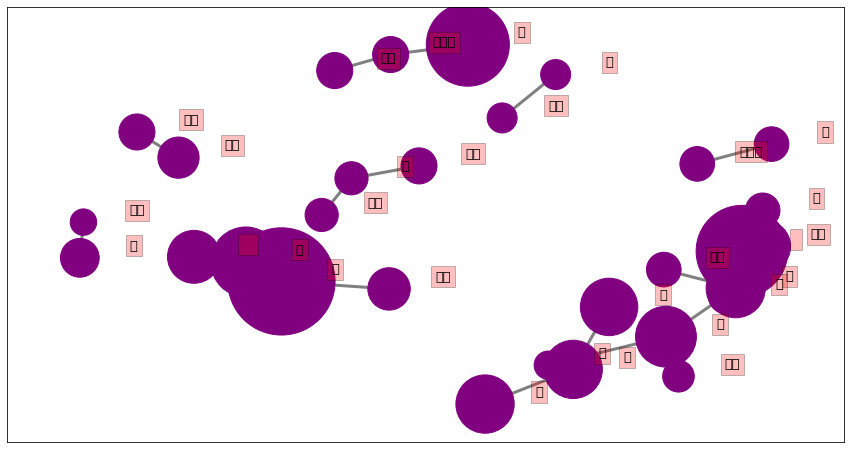

In [27]:
ja_statistics.cooccurrence_network(ja_word_list)

s.py:151: UserWarning: Glyph 35069 (\N{CJK UNIFIED IDEOGRAPH-88FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33256 (\N{CJK UNIFIED IDEOGRAPH-81E8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24202 (\N{CJK UNIFIED IDEOGRAPH-5E8A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39443 (\N{CJK UNIFIED IDEOGRAPH-9A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\j

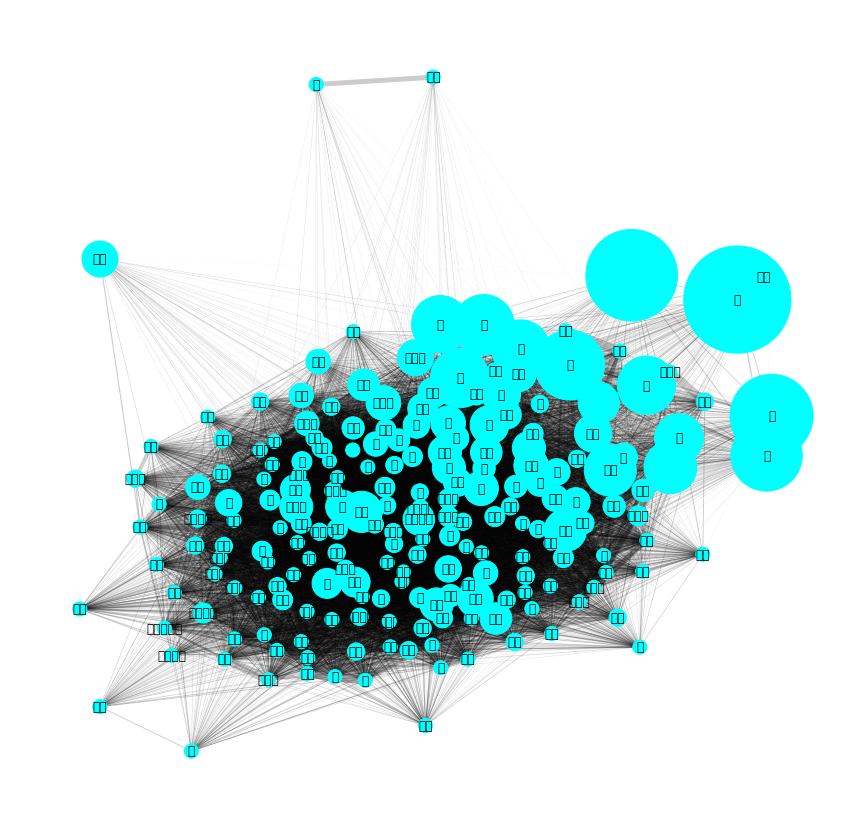

In [28]:
ja_statistics.create_word_network(ja_WordList_in_SentenceList,cnt=1)


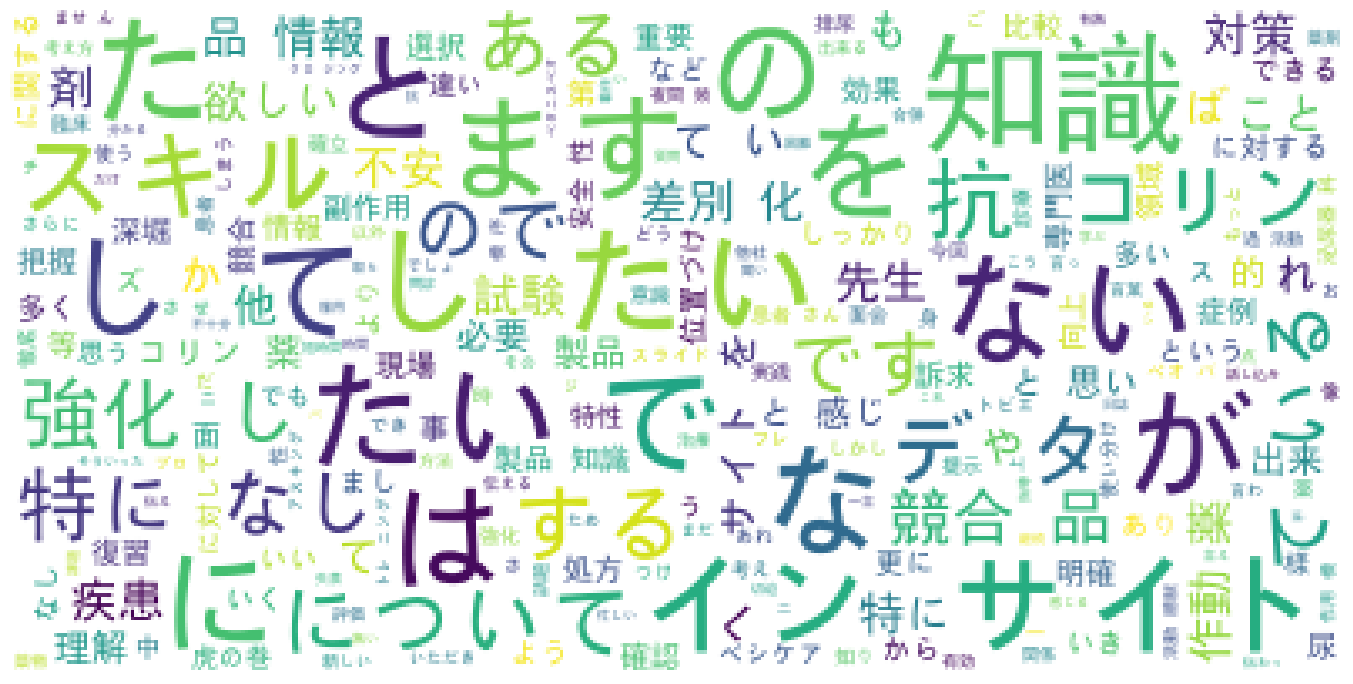

In [29]:
ja_statistics.word_cloud(ja_word_list)